In [ ]:
pip install -r requirements.txt

In [79]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
wildCrops = dd.read_csv("Data/A global database for the distributions of crop wild relatives/wildCrops.csv", sep='\t', dtype={'recordNumber': 'object',
       'speciesKey': 'float64'}, on_bad_lines='skip')

In [ ]:
wildCropsDF = wildCrops.compute()

In [78]:
wildCropsDF.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1304517142,07044577-bd82-4089-9f3a-f4a9d2170b2e,866e6c58-8c62-4990-8657-10627fa4d47d,Plantae,Tracheophyta,Magnoliopsida,Caryophyllales,Amaranthaceae,Chenopodium,Chenopodium berlandieri,...,NaN,NaN,CC_BY_4_0,NaN,F. R. Fosberg,NaN,NaN,2023-08-25T14:04:57.385Z,NaN,NaN
1,1304517160,07044577-bd82-4089-9f3a-f4a9d2170b2e,c789322e-0a2f-41db-b70a-2e0eb47d3219,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Grossulariaceae,Ribes,Ribes cereum,...,NaN,NaN,CC_BY_4_0,NaN,T. M. Hendrix,NaN,Native,2023-08-25T14:04:57.385Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,1304517214,07044577-bd82-4089-9f3a-f4a9d2170b2e,967c24fa-7e52-453d-acd6-b56745386273,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rosaceae,Fragaria,Fragaria virginiana,...,NaN,NaN,CC_BY_4_0,NaN,Harold and Virginia Bailey,NaN,Native,2023-08-25T14:04:57.385Z,NaN,NaN
3,1304517232,07044577-bd82-4089-9f3a-f4a9d2170b2e,9e138d15-6d34-433a-ae77-b83ef253edc4,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Elymus,Elymus saundersii,...,NaN,NaN,CC_BY_4_0,NaN,Peter H. Raven,NaN,NaN,2023-08-25T14:04:57.385Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,1304517250,07044577-bd82-4089-9f3a-f4a9d2170b2e,120bc4bd-6124-4f0f-9d02-84d58493f1bc,Plantae,Tracheophyta,Magnoliopsida,Saxifragales,Grossulariaceae,Ribes,Ribes roezlii,...,NaN,NaN,CC_BY_4_0,NaN,T. C. Fuller,NaN,NaN,2023-08-25T14:04:57.389Z,NaN,NaN


In [37]:
wildCropsDF.shape

(3393632, 50)

In [38]:
wildCropsDF.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [39]:
wildCropsSpecies = wildCropsDF[['species','decimalLatitude','decimalLongitude']]
wildCropsSpeciesNonNullCoordinates = wildCropsSpecies[wildCropsSpecies.notnull().all(1)]

In [40]:
wildCropsSpeciesNonNullCoordinates.head

<bound method NDFrame.head of                        species  decimalLatitude  decimalLongitude
1                 Ribes cereum        38.234699       -119.350601
3            Elymus saundersii        37.358154       -118.805267
5       Solanum agrimonifolium        14.932100        -91.906300
7         Dioscorea bartlettii        17.202500        -89.616800
8           Allium falcifolium        40.340000       -123.540000
...                        ...              ...               ...
141996          Setaria pumila        42.293300         27.618300
141998                Zea mays        20.130000       -103.330000
142004         Cicer arietinum        38.905300         48.395600
142006                Zea mays        44.100000         21.600000
142010         Capsicum annuum        37.306400         -4.654170

[1235244 rows x 3 columns]>

In [41]:
plantSpeciesGroupByCoordinates = wildCropsSpeciesNonNullCoordinates.groupby(
    ["decimalLatitude","decimalLongitude"], as_index=False
    )["species"].nunique()

In [42]:
plantSpeciesGroupByCoordinates.head()

,decimalLatitude,decimalLongitude,species
0,-80.334400,-84.192200,2
1,-80.333333,-84.166667,1
2,-60.666667,-60.666667,2
3,-60.500000,-60.500000,1
4,-60.250000,-60.250000,1


In [43]:
plantSpeciesGroupByCoordinates["species"].max()

4048

In [44]:
newColumnsTitles = ["species","decimalLatitude","decimalLongitude"]
plantSpeciesGroupByCoordinates=plantSpeciesGroupByCoordinates.reindex(columns=newColumnsTitles)

In [45]:
plantSpeciesGroupByCoordinates.head()

,species,decimalLatitude,decimalLongitude
0,2,-80.334400,-84.192200
1,1,-80.333333,-84.166667
2,2,-60.666667,-60.666667
3,1,-60.500000,-60.500000
4,1,-60.250000,-60.250000


In [46]:
plantSpeciesGroupByCoordinatesArray = plantSpeciesGroupByCoordinates.to_numpy()

In [77]:
plantSpeciesGroupByCoordinatesArray

array([[  2.      , -80.3344  , -84.1922  ],
       [  1.      , -80.333333, -84.166667],
       [  2.      , -60.666667, -60.666667],
       ...,
       [  1.      ,  89.166667, -13.483333],
       [  1.      ,  89.208333, -15.416667],
       [  2.      ,  89.716667, -48.166667]])

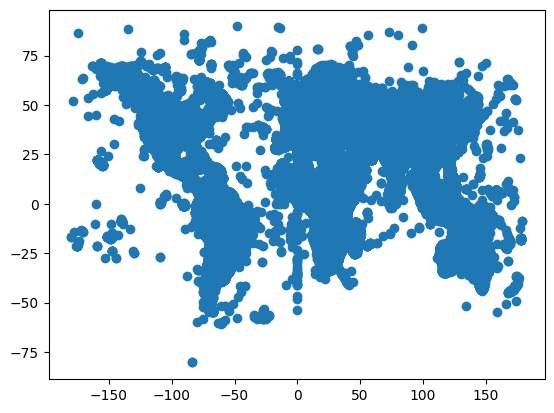

In [86]:
plt.scatter(plantSpeciesGroupByCoordinatesArray[:,2],
                                        plantSpeciesGroupByCoordinatesArray[:,1])

In [74]:
plantSpeciesGroupByCoordinates.min()

species               1.0000
decimalLatitude     -80.3344
decimalLongitude   -179.9300
dtype: float64

In [75]:
plantSpeciesGroupByCoordinates.max()

species             4048.000000
decimalLatitude       89.716667
decimalLongitude     179.216800
dtype: float64

In [48]:
coordinatesGrid = np.load("coordinatesGrid.npy")/1e5

In [49]:
coordinatesGrid

array([[[-173.19285864,   73.00124521],
        [-172.22799592,   73.00124521],
        [-171.26313319,   73.00124521],
        ...,
        [ 171.26313319,   73.00124521],
        [ 172.22799592,   73.00124521],
        [ 173.19285864,   73.00124521]],

       [[-173.19285864,   72.03609563],
        [-172.22799592,   72.03609563],
        [-171.26313319,   72.03609563],
        ...,
        [ 171.26313319,   72.03609563],
        [ 172.22799592,   72.03609563],
        [ 173.19285864,   72.03609563]],

       [[-173.19285864,   71.07094606],
        [-172.22799592,   71.07094606],
        [-171.26313319,   71.07094606],
        ...,
        [ 171.26313319,   71.07094606],
        [ 172.22799592,   71.07094606],
        [ 173.19285864,   71.07094606]],

       ...,

       [[-173.19285864,  -61.15454606],
        [-172.22799592,  -61.15454606],
        [-171.26313319,  -61.15454606],
        ...,
        [ 171.26313319,  -61.15454606],
        [ 172.22799592,  -61.15454606],
        [

In [50]:
coordinatesGrid.shape

(142, 360, 2)

In [87]:
longitudes = coordinatesGrid[0][:,0]
longitudeMin, longitudeMax = longitudes.min(), longitudes.max()

In [89]:
latitudes = coordinatesGrid[:,0][:,1]
latitudeMin, latitudeMax = latitudes.min(), latitudes.max()

In [91]:
height = len(latitudes)
width = len(longitudes)


In [95]:
allPlants = np.zeros([height,width,3])
for i in range(len(latitudes)):
    for j in range(len(longitudes)):
        allPlants[i][j][1] = coordinatesGrid[i][j][0]
        allPlants[i][j][2] = coordinatesGrid[i][j][1]

On veut trouver les cases de la grille de coordonnées où mettre les différentes espèces de plantes. 

Soit une espèce présente dans les cases $$(x,y)$$. On note $$w, h$$ les largeurs et hauteurs de la grille de coordonnées?
On veut trouver la case $$(h-i-1,j)$$ dans laquelle insérer l'espèce dans la grille des coordonnées. (les latitudes sont rangées dans l'ordre décroissant)
Notons respectivement : $$x_{min}, x_{max}, y_{min}, y_{max}$$
Les longitudes minimum et maximum, les latittudes minimum et maximum

On a : 

$$ x_{min} + \frac{x_{max} - x_{min}}{w} j \leq x < x_{min} + \frac{x_{max} - x_{min}}{w} (j+1)$$

Et :

$$ y_{max} - \frac{y_{max} - y_{min}}{h} (i+1) < y \leq y_{max} - \frac{y_{max} - y_{min}}{h} i$$

On obtient alors :

$$j = \lfloor w \frac{x-x_{min}}{x_{max}-x_{min}} \rfloor$$

et 

$$i = \lfloor h \frac{y_{max}-y}{y_{max}-y_{min}}\rfloor$$

In [65]:
plantSpeciesGroupByCoordinatesArray[0]

array([  2.    , -80.3344, -84.1922])

In [120]:
for nbSpeciesInCoordinate in plantSpeciesGroupByCoordinatesArray :
    x = nbSpeciesInCoordinate[1]
    y = nbSpeciesInCoordinate[2]
    if latitudeMin <= y <= latitudeMax and longitudeMin <= x <= longitudeMax:
        i = int(height*(latitudeMax-y)/(latitudeMax-latitudeMin))
        j = int(width*(x- longitudeMin)/(longitudeMax-longitudeMin))
        allPlants[-i][j][0] += nbSpeciesInCoordinate[0]
    

In [131]:
allPlants[:,:,0].mean()

24.556455399061033

In [132]:
allPlants

array([[[   0.        , -173.19285864,   73.00124521],
        [   0.        , -172.22799592,   73.00124521],
        [   0.        , -171.26313319,   73.00124521],
        ...,
        [   0.        ,  171.26313319,   73.00124521],
        [   0.        ,  172.22799592,   73.00124521],
        [   0.        ,  173.19285864,   73.00124521]],

       [[   0.        , -173.19285864,   72.03609563],
        [   0.        , -172.22799592,   72.03609563],
        [   0.        , -171.26313319,   72.03609563],
        ...,
        [   0.        ,  171.26313319,   72.03609563],
        [   0.        ,  172.22799592,   72.03609563],
        [   0.        ,  173.19285864,   72.03609563]],

       [[   0.        , -173.19285864,   71.07094606],
        [   0.        , -172.22799592,   71.07094606],
        [   0.        , -171.26313319,   71.07094606],
        ...,
        [   0.        ,  171.26313319,   71.07094606],
        [   0.        ,  172.22799592,   71.07094606],
        [   0.        

In [133]:
np.save("wildCropsCousinsDiversity",allPlants)